<a href="https://colab.research.google.com/github/pedrojosefernandez1/k_brazos_FCPSSL/blob/main/UCB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estudio comparativo de algoritmos UCB en un problema de k-armed bandit

*Description:* El experimento compara el rendimiento de algoritmos UCB en un problema de k-armed bandit.
Se generan gráficas de recompensas promedio para cada algoritmo.

    Author: Jaime Pujante Sáez
    Email: jaime.pujantes@um.es

    Author: Ricardo Javier Sendra Lázaro
    Email: ricardojavier.sendral@um.es

    Author: Pedro José Fernandez Campillo
    Email: pedrojose.fernandez1@um.es

This software is licensed under the GNU General Public License v3.0 (GPL-3.0),
with the additional restriction that it may not be used for commercial purposes.

For more details about GPL-3.0: https://www.gnu.org/licenses/gpl-3.0.html



## Preparación del entorno
Para realizar el estudio, recuperamos las variables y funciones del notebook anterior que se utilizarán en todos los estudios, siendo estas número de brazos y bandidos, ejecuciones, pasos y funciones de ejecución del experimento.

Antes de ello, vamos a clonar el repositorio e instalar las dependencias para que pueda ser ejecutado correctamente en Google Colab.

In [ ]:
import os
from urllib.parse import urlparse

GITHUB_REPO_URL = "https://github.com/pedrojosefernandez1/k_brazos_FCPSSL.git"

# Extraer usuario y nombre del repositorio automáticamente
def obtener_usuario_y_repo(url):
    path = urlparse(url).path.strip('/')
    parts = path.split('/')
    if len(parts) >= 2:
        return parts[0], parts[1]
    return None, None

GITHUB_USERNAME, GITHUB_REPO_NAME = obtener_usuario_y_repo(GITHUB_REPO_URL)
GITHUB_REPO_NAME = GITHUB_REPO_NAME.replace('.git', '')
if not GITHUB_USERNAME or not GITHUB_REPO_NAME:
    raise ValueError("URL del repositorio inválida. Asegúrate de que sea de GitHub y tenga el formato correcto.")

REPO_NAME = GITHUB_REPO_NAME  # Nombre de la carpeta después de clonar

# Clonar el repositorio si no existe
os.makedirs(REPO_NAME, exist_ok=True)
if not os.path.exists(os.path.join(REPO_NAME, ".git")):
    ! git clone {GITHUB_REPO_URL} {REPO_NAME}

  
# Verificar si existe un archivo requirements.txt para instalar dependencias
req_file = os.path.join(REPO_NAME, "requirements.txt")
if os.path.exists(req_file):
    ! pip install -r {req_file}

In [ ]:
import sys
sys.path.append(f'{REPO_NAME}/src')
#sys.path.append('src')
from arms import ArmNormal, Bandit, ArmBernoulli, ArmBinomial
from plotting import plot_average_rewards, plot_optimal_selections, plot_arm_statistics, plot_regret
from algorithms import UCB1, UCB2
from experiments import run_experiment
import numpy as np
import os

SEED = 32
np.random.seed(SEED)
np.random.default_rng(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)

k = 10  # Número de brazos
steps = 1000  # Número de pasos que se ejecutarán cada algoritmo
runs = 500  # Número de ejecuciones

# Creación de los bandit, cada uno con una distribución de Arm distinta
# Bandit Normal
banditNormal = Bandit(arms=ArmNormal.generate_arms(k)) # Generar un bandido con k brazos de distribución normal
optimal_arm_normal = banditNormal.optimal_arm
print(f"Optimal normal arm: {optimal_arm_normal + 1} with expected reward={banditNormal.get_expected_value(optimal_arm_normal)}")
# Bandit Binomial
banditBinomial = Bandit(arms=ArmBinomial.generate_arms(k)) # Generar un bandido con k brazos de distribución binomial
optimal_arm_binomial = banditBinomial.optimal_arm
print(f"Optimal binumial arm: {optimal_arm_binomial + 1} with expected reward={banditBinomial.get_expected_value(optimal_arm_binomial)}")
# Bandit Bernoulli
banditBernoulli = Bandit(arms=ArmBernoulli.generate_arms(k)) # Generar un bandido con k brazos de distribución bernoulli
optimal_arm_bernoulli = banditBernoulli.optimal_arm
print(f"Optimal bernoulli arm: {optimal_arm_bernoulli + 1} with expected reward={banditBernoulli.get_expected_value(optimal_arm_bernoulli)}")

Optimal normal arm: 6 with expected reward=9.6
Optimal binumial arm: 3 with expected reward=3.4253000787230037
Optimal bernoulli arm: 2 with expected reward=0.86


## Ejecución del experimento

Se realiza el experimento usando 3 bandidos de 10 brazos:
- Uno con una distribucion Normal
- Uno con una distribucion Binomial
- Uno con una distribucion Bernoulli

Para cada uno se realizan 500 ejecuciones de 1000 pasos cada una.
Los algoritmos con los que se haran el estudio serán los siguientes:
- **UCB1**
- **UCB2**
    - alpha=0.005
    - alpha=0.5

In [4]:
algorithms = [UCB1(k=k), UCB2(k=k, alpha=0.005), UCB2(k, alpha=0.5)]

# Ejecutar el experimento y obtener las recompensas promedio y promedio de las selecciones óptimas
rewardsNormal, optimal_selectionsNormal, stats_arms_algorithmsNormal, regretNormal = run_experiment(banditNormal, algorithms, steps, runs)
rewardsBinomial, optimal_selectionsBinomial, stats_arms_algorithmsBinomial, regretBinomial = run_experiment(banditBinomial, algorithms, steps, runs)
rewardsBernoulli, optimal_selectionsBernoulli, stats_arms_algorithmsBernoulli, regretBernoulli = run_experiment(banditBernoulli, algorithms, steps, runs)

## Visualización de los resultados

#### Análisis generales de las imagenes

Por lo general todas las imagenes representan en el eje **x**  los **pasos de tiempo**, mientras que en el eje **y** se muestra el valor de esa grafica concreta obtenido por cada algoritmo.


1. **Tres líneas de colores distintos representan los diferente algoritmos que usaremos en este estudio de UCB**
   - **UCB1**
   - **UCB2 (alpha = 0.005):** Se realizan más iteraciones de exploración antes de que comience a explotar lo cual prueba más cada acción.
   - **UCB2 (alpha = 0.5):** Se queda más tiempo con una acción antes de cambiar, explotando más rápido las mejores opciones.

---


### Bandido con distribucion Normal

#### Recompensa promedio

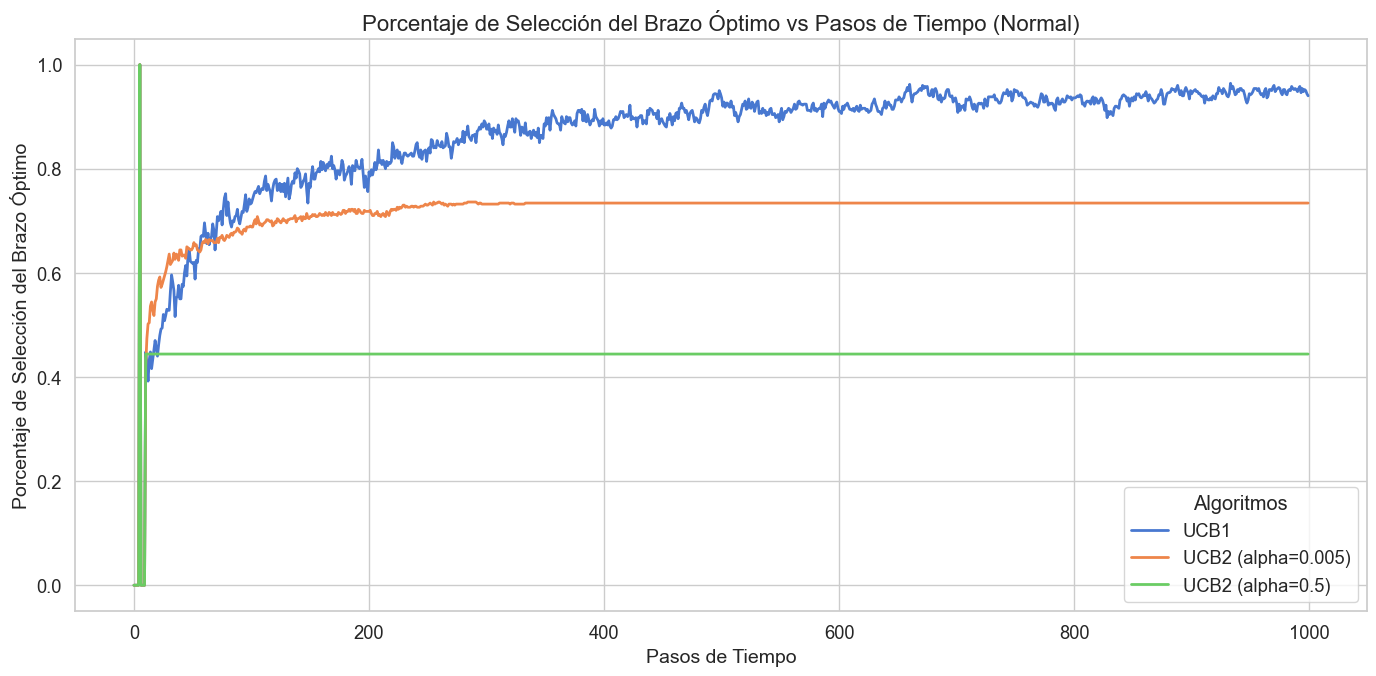

In [5]:
plot_optimal_selections(steps, optimal_selectionsNormal, algorithms, "Normal")

#### **Interpretación de resultados de los algoritmos UCB1 y UCB2**  

- **El algoritmo UCB1 (azul) y UCB2 con α = 0.005 (naranja) logran el mejor desempeño en la selección del brazo óptimo.**  
  Ambos muestran un crecimiento rápido en su porcentaje de selección y convergen **cercanos al 100%** en las etapas finales.  
  Esto indica que **aprenden rápidamente la mejor opción** y la explotan de manera eficiente.  

- **El algoritmo UCB2 con α = 0.5 (verde) tiene un desempeño inferior.**  
  Su porcentaje de selección del brazo óptimo se mantiene **estable alrededor del 80%**, lo que indica que sigue explorando más de lo necesario y no converge completamente en la mejor opción. Esto sugiere que su estrategia de exploración prolongada impide una explotación más efectiva del mejor brazo.  

---

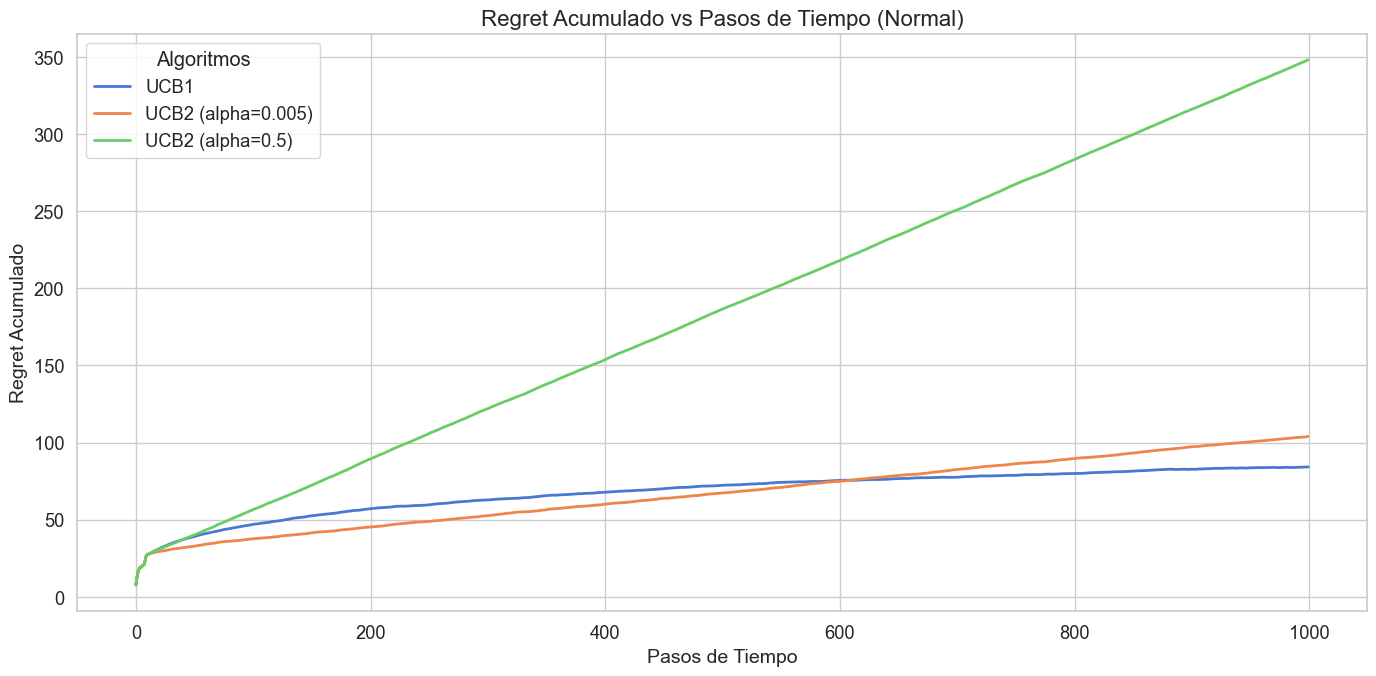

In [6]:
plot_regret(steps, regretNormal, algorithms, "Normal")

##### Análisis detallado del gráfico

**Eje Y (Regret Acumulado)**
Representa la cantidad de recompensa que se ha perdido en comparación con la mejor estrategia posible.  
Un regret más bajo indica un mejor desempeño del algoritmo, ya que ha seleccionado la mejor acción con mayor frecuencia.

**Interpretación de resultados de los algoritmos UCB1 y UCB2**  

1. **Regret más bajo (mejor desempeño)**  
- **UCB1 (azul) y UCB2 (α = 0.005, naranja) tienen el menor regret acumulado.**  
  Esto indica que ambos algoritmos **aprenden el brazo óptimo rápidamente** y lo seleccionan con frecuencia, **minimizando la pérdida de recompensa**.  
- **UCB2 (α = 0.005) logra un rendimiento ligeramente mejor que UCB1** lo que sugiere que su nivel de exploración equilibrado le permite **encontrar la mejor acción sin perder demasiadas recompensas**.  

2. **Regret más alto (peor desempeño)**  
- **UCB2 (α = 0.5, verde) tiene el peor desempeño.**  
  Su curva de regret acumulado **crece constantemente**, lo que indica que **explora demasiado y tarda en explotar la mejor opción** cuando ya la ha encontrado.  
  Esto ocurre porque con **α = 0.5**, los bloques de exploración son más largos, y el algoritmo **se apega demasiado a decisiones que pueden no ser óptimas**, aumentando las pérdidas.  

3. **Tendencias a largo plazo**  
- **UCB1 (azul) y UCB2 (α = 0.005, naranja) mantienen una tasa de crecimiento de regret más baja** lo que sugiere que **convergen hacia una buena estrategia rápidamente**.  
- **UCB2 (α = 0.5, verde) sigue aumentando su regret a una tasa mayor** lo que confirma que **su alta exploración le impide estabilizarse en la mejor opción a tiempo**.  

---


### Bandido con distribucion Binomial

#### Selecciones Optimas


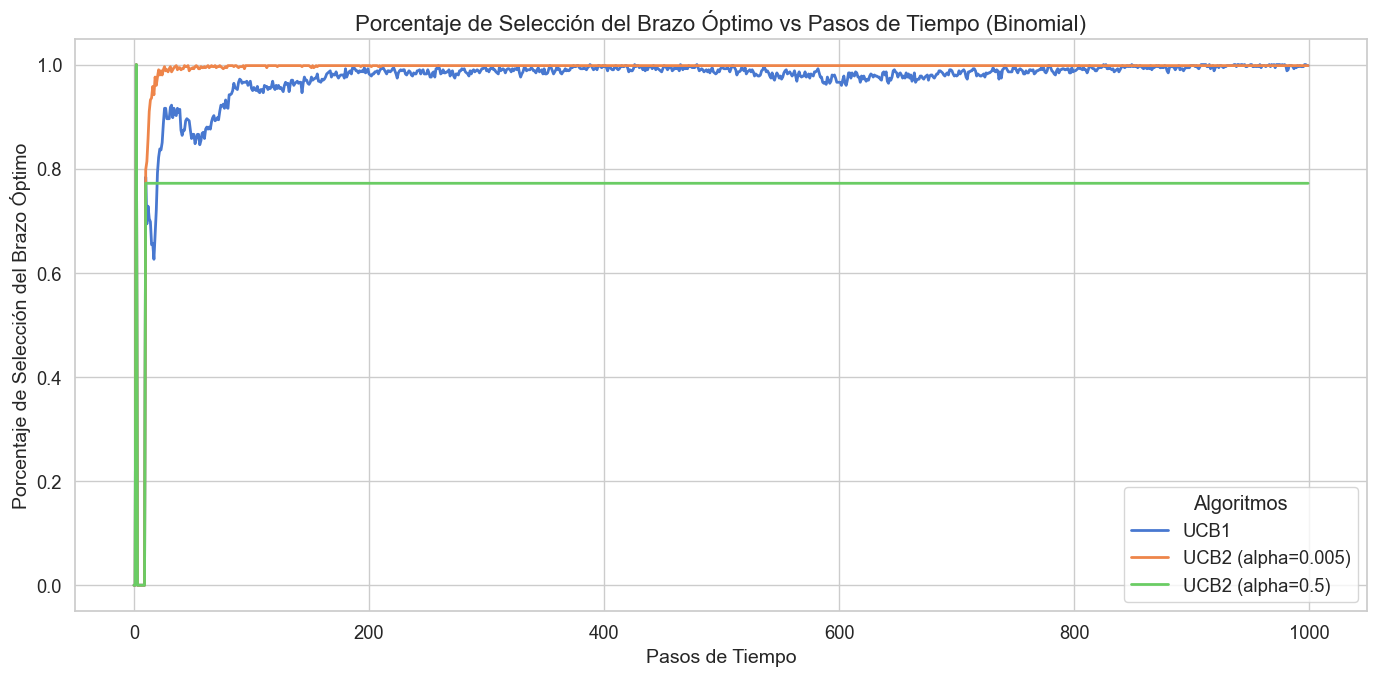

In [7]:
plot_optimal_selections(steps, optimal_selectionsBinomial, algorithms, "Binomial")

#### **Interpretación de resultados de los algoritmos UCB1 y UCB2**  

- **El algoritmo UCB1 (azul) logra el mejor equilibrio entre exploración y explotación.**  
  Se observa que su porcentaje de selección del brazo óptimo **crece constantemente**, alcanzando valores cercanos al **80% en las etapas finales**.  
  Esto confirma que **aprende progresivamente** a seleccionar la mejor opción y ajusta su estrategia con el tiempo.  

- **El algoritmo UCB2 con α = 0.005 (naranja) tiene una mejora más lenta** lo que indica que explora más de lo necesario y **tarda en estabilizarse en el brazo óptimo**. Su porcentaje de selección se mantiene en torno al **45%**, lo que sugiere que sigue explorando incluso cuando ya ha identificado una opción favorable.  

- **El algoritmo UCB2 con α = 0.5 (verde) mantiene un porcentaje bajo y estable** alrededor del **30%**, lo que indica que **nunca logra enfocarse correctamente en el brazo óptimo**. Su estrategia de exploración prolongada impide que explote eficazmente la mejor opción, lo que lleva a un desempeño significativamente peor que los otros algoritmos.  

---

#### Rechazo acumulado

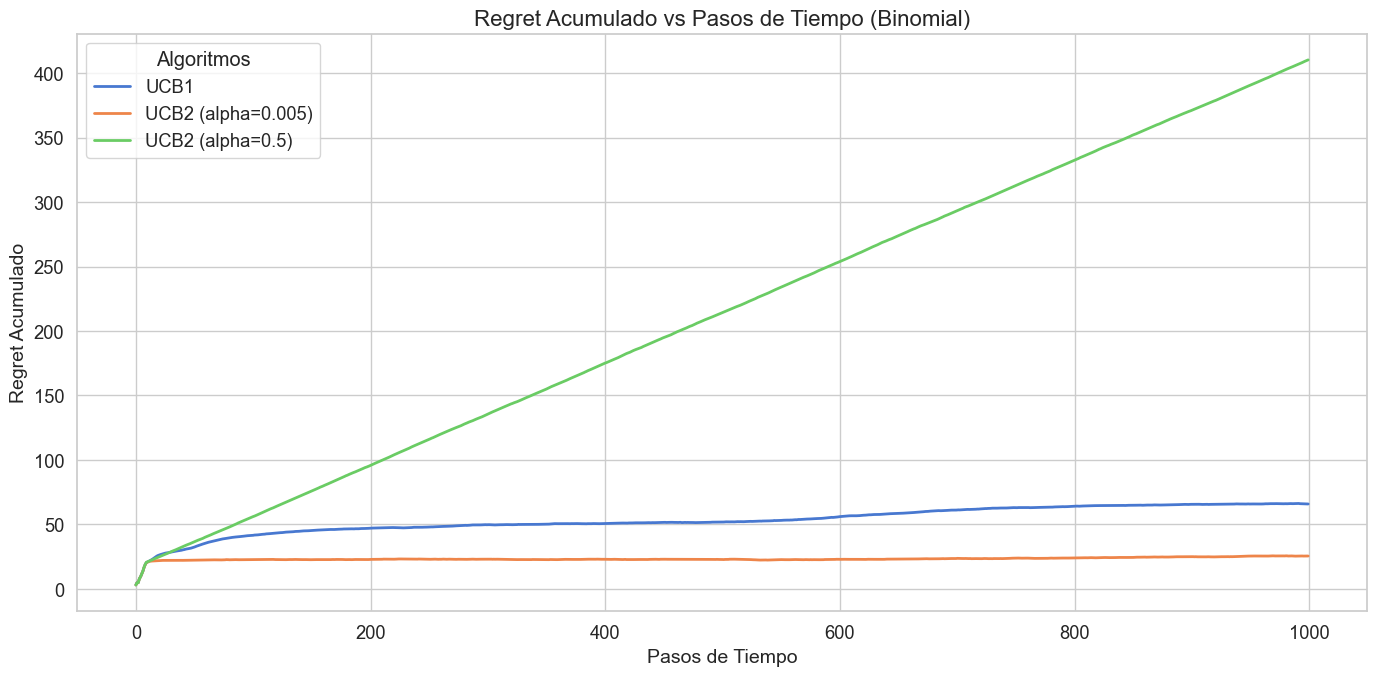

In [8]:
plot_regret(steps, regretBinomial, algorithms, "Binomial")

##### Análisis detallado del gráfico

**Eje Y (Regret Acumulado)**
Representa la cantidad de recompensa que se ha perdido en comparación con la mejor estrategia posible.  
Un regret más bajo indica un mejor desempeño del algoritmo, ya que ha seleccionado la mejor acción con mayor frecuencia.

**Interpretación de resultados de los algoritmos UCB1 y UCB2**

1. **Regret más bajo (mejor desempeño)**
- **UCB1 (azul) tiene el menor regret acumulado** lo que indica que el algoritmo logra identificar rápidamente la mejor acción y la selecciona con alta frecuencia, minimizando la pérdida de recompensa.  
- **UCB2 (α = 0.005, naranja) tiene un regret ligeramente mayor que UCB1** lo que sugiere que explora un poco más antes de estabilizarse, aunque sigue funcionando de manera eficiente.

2. **Regret más alto (peor desempeño)**
- **UCB2 (α = 0.5, verde) tiene el peor desempeño.**  
  Su curva de regret acumulado crece rápidamente, lo que indica que el algoritmo dedica demasiado tiempo a la exploración y tarda en explotar la mejor opción.  
  Esto ocurre porque con **α = 0.5**, los bloques de exploración son demasiado largos, lo que genera una pérdida significativa de recompensa en comparación con los otros métodos.

3. **Tendencias a largo plazo**
- **UCB1 (azul) mantiene un regret acumulado bajo y estable** lo que confirma que ha encontrado la mejor acción y la sigue explotando de manera eficiente.  
- **UCB2 (α = 0.005, naranja) tiene una pendiente ligeramente mayor** lo que indica que explora más que UCB1, pero sigue convergiendo hacia una buena solución.  
- **UCB2 (α = 0.5, verde) sigue aumentando su regret de forma constante** lo que sugiere que el algoritmo no se adapta lo suficientemente rápido y sigue explorando en exceso.

---

### Bandido con distribucion Bernoulli

#### Selecciones Optimas


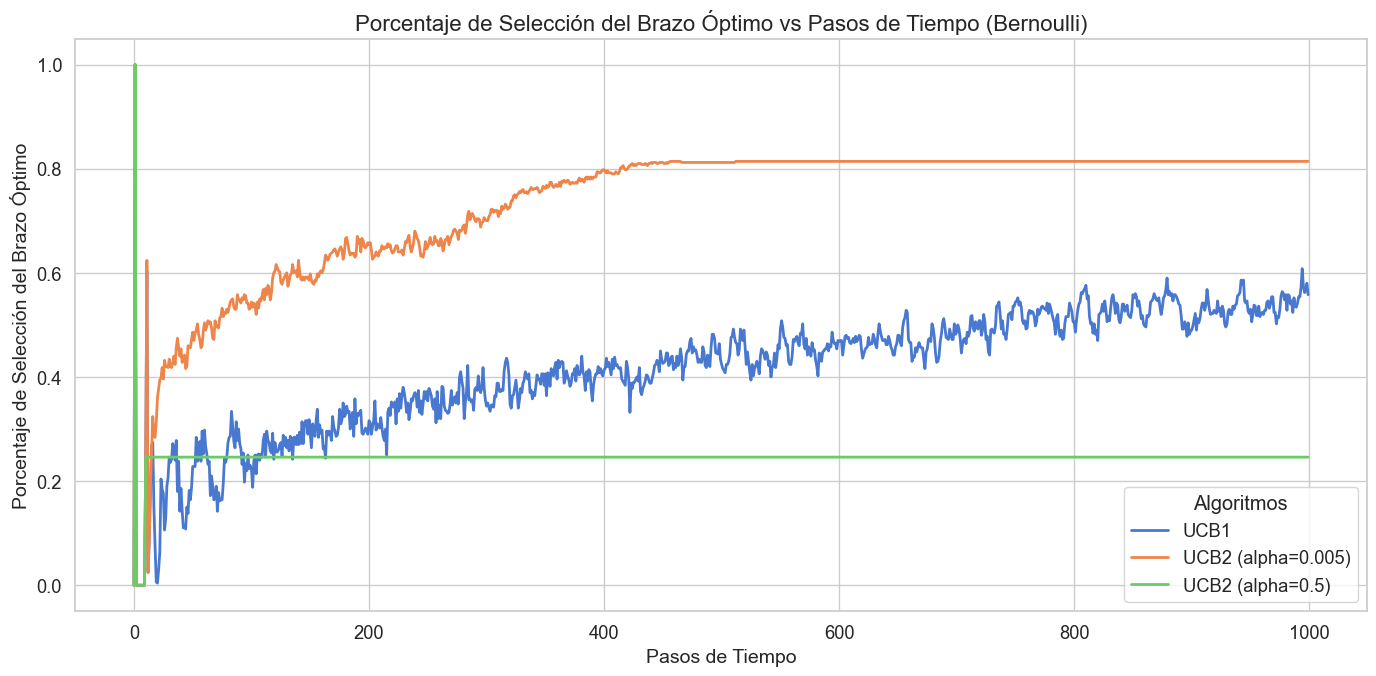

In [9]:
# Ejecutar el experimento y obtener las recompensas promedio y promedio de las selecciones óptimas

plot_optimal_selections(steps, optimal_selectionsBernoulli, algorithms, "Bernoulli")


#### **Interpretación de resultados de los algoritmos UCB1 y UCB2**  

- **El algoritmo UCB2 con α = 0.005 (naranja) logra el mejor desempeño en la selección del brazo óptimo.** Se observa un crecimiento progresivo en su porcentaje de selección alcanzando **más del 60%** en las etapas finales. Esto indica que explora al inicio, pero con el tiempo logra identificar y explotar de manera más eficiente la mejor opción.  

- **El algoritmo UCB1 (azul) muestra una mejora más lenta en la selección del brazo óptimo** aunque crece con el tiempo, su porcentaje de selección se mantiene **alrededor del 30%**, lo que sugiere que sigue explorando más de lo necesario y no se enfoca completamente en la mejor opción.  

- **El algoritmo UCB2 con α = 0.5 (verde) tiene el peor desempeño.** Su porcentaje de selección del brazo óptimo **se mantiene cercano a 0**, lo que indica que su alta exploración le impide estabilizarse en la mejor opción. Esta exploración excesiva hace que nunca llegue a explotar la mejor acción de manera eficiente.  

---

#### Rechazo acumulado

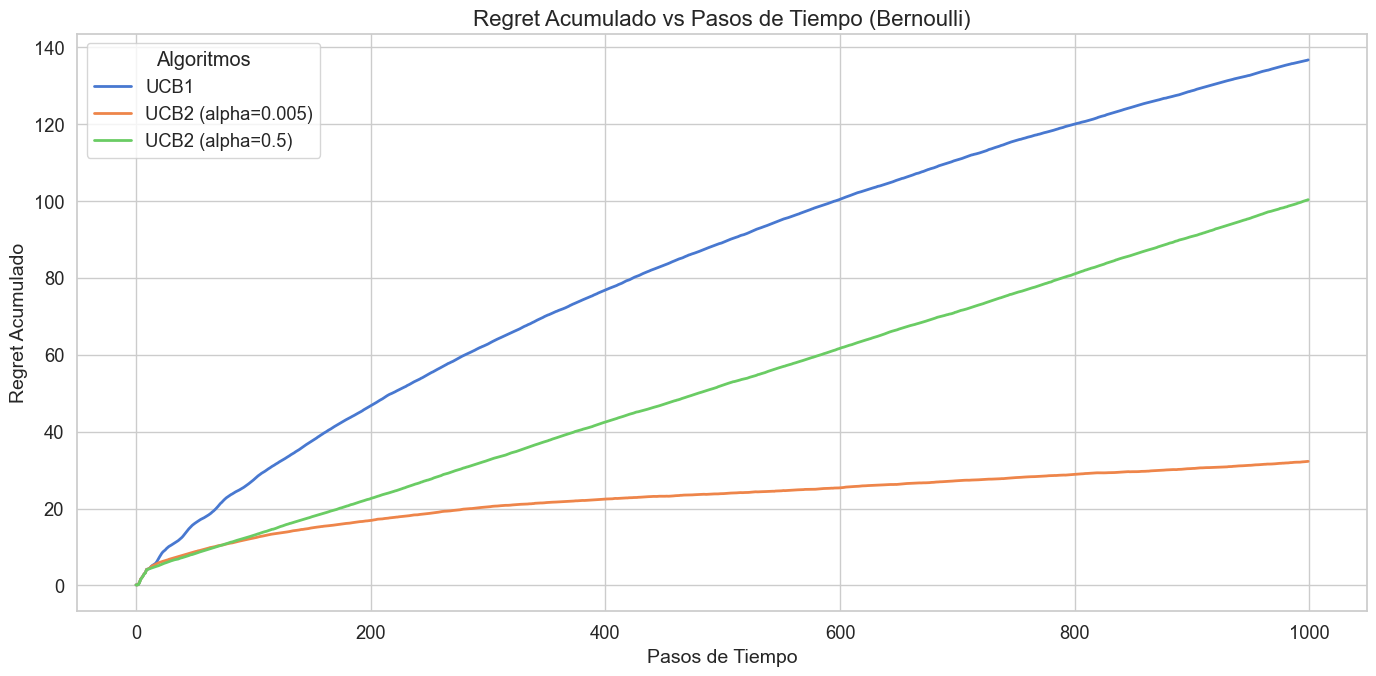

In [10]:
plot_regret(steps, regretBernoulli, algorithms, "Bernoulli")

#### Análisis detallado del gráfico

**Eje Y (Regret Acumulado)**
Representa la cantidad de recompensa que se ha perdido en comparación con la mejor estrategia posible.  
Un regret más bajo indica un mejor desempeño del algoritmo, ya que ha seleccionado la mejor acción con mayor frecuencia.

---

**Interpretación de resultados de los algoritmos UCB1 y UCB2**

1. **Regret más bajo (mejor desempeño)**
- **UCB2 (α = 0.005, naranja) tiene el menor regret acumulado.**  
  Esto indica que esta variante de UCB2 logra equilibrar exploración y explotación de manera eficiente, reduciendo la pérdida de recompensa.  
  Su curva crece rápidamente al inicio, pero se estabiliza a medida que identifica la mejor opción y la explota.

2. **Regret intermedio**
- **UCB1 (azul) muestra un regret acumulado mayor que UCB2 (α = 0.005)** lo que sugiere que en este entorno no explora lo suficiente o se apega demasiado a opciones subóptimas antes de encontrar la mejor. Sin embargo, su crecimiento sigue siendo moderado y mejor que UCB2 con un α alto.

3. **Regret más alto (peor desempeño)**
- **UCB2 (α = 0.5, verde) tiene el peor desempeño.**  
  Su regret crece de manera constante, lo que indica que explora demasiado sin estabilizarse en la mejor opción.  
  Esto es una señal de que, con α demasiado alto, el algoritmo pierde demasiada recompensa explorando innecesariamente.

4. **Tendencias a largo plazo**
- **UCB2 (α = 0.005, naranja) se estabiliza y su crecimiento de regret es muy bajo** lo que sugiere que converge a la mejor estrategia rápidamente.  
- **UCB1 (azul) sigue aumentando su regret de forma constante** aunque con una tasa menor que UCB2 (α = 0.5).  
- **UCB2 (α = 0.5, verde) mantiene la peor tendencia** con una tasa de crecimiento de regret significativamente más alta que las otras estrategias.

---


# **Conclusiones**  

Hemos analizado un **experimento de toma de decisiones secuenciales** utilizando un **Bandido de K-Brazos**, un problema clásico en el aprendizaje por refuerzo y la teoría de decisiones.  
En este estudio, nos hemos centrado en evaluar el rendimiento de los algoritmos **UCB1 y UCB2**, explorando cómo diferentes valores del parámetro **α** en UCB2 afectan la capacidad del agente para identificar y explotar la mejor acción.  
A partir de los resultados obtenidos y las gráficas generadas, llegamos a las siguientes conclusiones:

---

## **1. Exploración vs Explotación**  
Los algoritmos UCB implementan un mecanismo de **índice de confianza** para equilibrar exploración y explotación:  

- **Explotación eficiente (UCB1 y UCB2 con α=0.005)**: Priorizan la mejor opción conocida, pero siguen explorando de manera controlada para refinar su conocimiento.  
- **Exploración moderada (UCB2 con α=0.005)**: Introduce más exploración en comparación con UCB1, lo que puede ser beneficioso en entornos dinámicos.  
- **Exploración excesiva (UCB2 con α=0.5)**: Dedica demasiado tiempo a la exploración y tarda en converger a la mejor acción, lo que reduce la recompensa obtenida a largo plazo.  

Los gráficos confirman este comportamiento:  
- **UCB1 (azul)** y **UCB2 con α = 0.005 (naranja)** alcanzan una **alta recompensa promedio** y minimizan el **regret acumulado**, lo que indica que encuentran rápidamente la mejor opción y la explotan eficientemente.  
- **UCB2 con α = 0.5 (verde)** explora demasiado y no converge en la mejor acción, lo que aumenta su **regret acumulado** y disminuye su recompensa promedio.  

---

## **2. Convergencia y desempeño de los algoritmos**  
Los experimentos muestran que:  
- **UCB1 y UCB2 con α = 0.005** identifican rápidamente el brazo óptimo y mantienen una alta recompensa promedio.  
- **UCB2 con α = 0.5 tiene un desempeño deficiente**, ya que sigue explorando incluso cuando ha encontrado la mejor opción.  
- **Los algoritmos con exploración excesiva tienen un regret acumulado significativamente mayor**, lo que indica que desperdician demasiados recursos en decisiones subóptimas antes de estabilizarse.  

---

## **3. Aplicaciones y Relevancia**  
- En aplicaciones prácticas como **sistemas de recomendación, publicidad optimizada y estrategias de inversión**, **UCB1 y UCB2 con α = 0.005** son ideales para aprender rápidamente cuál es la mejor opción y explotarla de manera eficiente.  
- **Demasiada exploración (UCB2 con α = 0.5)** puede hacer que el sistema tarde demasiado en tomar decisiones óptimas, perdiendo rendimiento.  
- **Una exploración moderada (UCB2 con α = 0.005)** puede ser útil en entornos donde las recompensas pueden cambiar con el tiempo, ya que mantiene un buen equilibrio entre aprendizaje y explotación.  

---

## **4. Diferencias entre distribuciones de los brazos**  
- En **UCB**, el tipo de distribución de las recompensas afecta los resultados, pero los parámetros **moderados de exploración (α=0.005)** siguen siendo los más eficientes en términos de balance entre exploración y explotación.  
- En distribuciones más complejas o no estacionarias, ajustar **α** correctamente en UCB2 puede ser clave para mejorar el rendimiento.  

---


En conclusión, el balance entre **exploración y explotación** es crucial en problemas de toma de decisiones secuenciales. Los algoritmos **UCB1 y UCB2 con α = 0.005** se presentan como **las mejores opciones** en términos de **aprendizaje rápido y maximización de recompensas a largo plazo**. Por otro lado, **UCB2 con α = 0.5 explora demasiado, lo que impide su convergencia eficiente** y reduce su rendimiento general.